Voy a hacer un notebook sobre un dataset que he encontrado de Padre de familia, lo primero va a ser ver cuales son las distintas variable que tiene.

In [4]:
import pandas as pd
df = pd.read_csv('/content/Family Guy Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Season                    400 non-null    int64  
 1   No. of Episode (Season)   400 non-null    int64  
 2   No. of Episode (Overall)  400 non-null    int64  
 3   Title of the Episode      400 non-null    object 
 4   Director                  400 non-null    object 
 5   Assistant Director        400 non-null    object 
 6   Written by                400 non-null    object 
 7   Storyboard by             400 non-null    object 
 8   Guest Starring            400 non-null    object 
 9   Featuring                 400 non-null    object 
 10  Also Appearing            400 non-null    object 
 11  Musical Numbers           400 non-null    object 
 12  Original Air Date         400 non-null    object 
 13  Product Code              400 non-null    object 
 14  U.S. Viewe

Ahora que ya hemos visto las variables que tiene, el notebook se va a centrar principalmente en el numero apariciones de los personajes, ya sea como protagonistas de los episodios o que simplemente aparezcan brevemente en los episodios.

In [24]:
# Ahora vamos a ver en cuantos episodios protagoniza cada personaje
from collections import defaultdict
import matplotlib.pyplot as plt

conteo_por_personaje = defaultdict(int)

personajes_por_episodio = df['Featuring']

for episodio in personajes_por_episodio:
    personajes_episodio = episodio.split(', ')
    personajes_unicos = set(personajes_episodio)
    for personaje in personajes_unicos:
        conteo_por_personaje[personaje] += 1

#Filtramos los que hayan protagonizado al menos 3 episodios
conteo_filtrado = {personaje: conteo for personaje, conteo in conteo_por_personaje.items() if conteo > 2}

nombres_personajes = list(conteo_filtrado.keys())
recuento_episodios = list(conteo_filtrado.values())

# Ordenar el diccionario de mayor a menor
conteo_ordenado = {k: v for k, v in sorted(conteo_filtrado.items(), key=lambda item: item[1], reverse=True)}

# Imprimir los personajes
for personaje, recuento in conteo_ordenado.items():
    print(f"{personaje}: {recuento} episodios")



Peter Griffin: 185 episodios
Brian: 128 episodios
Lois Griffin: 80 episodios
Stewie Griffin: 72 episodios
Peter: 61 episodios
Stewie: 47 episodios
Meg Griffin: 45 episodios
Chris Griffin: 43 episodios
Lois: 27 episodios
Glenn Quagmire: 26 episodios
Quagmire: 24 episodios
Joe: 20 episodios
Joe Swanson: 18 episodios
Chris: 16 episodios
Carter Pewterschmidt: 15 episodios
Meg: 13 episodios
Cleveland Brown: 13 episodios
Cleveland: 11 episodios
Mayor Adam West: 7 episodios
James Woods: 5 episodios
Tom Tucker: 5 episodios
Bonnie Swanson: 4 episodios
Herbert: 4 episodios
Death: 3 episodios
Jr.: 3 episodios
Bertram: 3 episodios
Mort Goldman: 3 episodios
Jillian: 3 episodios
Rupert: 3 episodios
Peter Griffin as Himself and Han Solo: 3 episodios
Cleveland Brown as R2-D2: 3 episodios
Lois Griffin as Herself and Princess Leia: 3 episodios
Brian Griffin as Himself and Chewbacca: 3 episodios
Glenn Quagmire as C-3PO: 3 episodios
Chris Griffin as Himself and Luke Skywalker: 3 episodios
Herbert as Obi-W

Ya tenemos la lista de todos los personajes que protagonizan al menos 3 episodios, ahora vamos a agrupar los personajes que estan definidos con más de un nombre y a eliminar a los personajes de los episodios especiales

In [25]:
personajes = {
    "Peter Griffin": 185,
    "Brian": 128,
    "Lois Griffin": 80,
    "Stewie Griffin": 72,
    "Peter": 61,
    "Stewie": 47,
    "Meg Griffin": 45,
    "Chris Griffin": 43,
    "Lois": 27,
    "Glenn Quagmire": 26,
    "Quagmire": 24,
    "Joe": 20,
    "Joe Swanson": 18,
    "Chris": 16,
    "Carter Pewterschmidt": 15,
    "Meg": 13,
    "Cleveland Brown": 13,
    "Cleveland": 11,
    "Mayor Adam West": 7,
    "James Woods": 5,
    "Tom Tucker": 5,
    "Bonnie Swanson": 4,
    "Herbert": 4,
    "Death": 3,
    "Jr.": 3,
    "Bertram": 3,
    "Mort Goldman": 3,
    "Jillian": 3,
    "Rupert": 3,
    "Herbert as Obi-Wan Kenobi": 3,
    "Lois Griffin as Herself and Princess Leia": 3,
    "Brian Griffin as Himself and Chewbacca": 3,
    "Glenn Quagmire as C-3PO": 3,
    "Cleveland Brown as R2-D2": 3,
    "Chris Griffin as Himself and Luke Skywalker": 3,
    "Peter Griffin as Himself and Han Solo": 3,
    "Barbara Pewterschmidt": 3,
}


# Ahora agrupamos los personajes que estan definidos con dos nombres distintos
if "Peter" in personajes and "Peter Griffin" in personajes:
    personajes["Peter Griffin"] += personajes["Peter"]
    del personajes["Peter"]

if "Stewie" in personajes and "Stewie Griffin" in personajes:
    personajes["Stewie Griffin"] += personajes["Stewie"]
    del personajes["Stewie"]

if "Lois" in personajes and "Lois Griffin" in personajes:
    personajes["Lois Griffin"] += personajes["Lois"]
    del personajes["Lois"]

if "Meg" in personajes and "Meg Griffin" in personajes:
    personajes["Meg Griffin"] += personajes["Meg"]
    del personajes["Meg"]

if "Chris" in personajes and "Chris Griffin" in personajes:
    personajes["Chris Griffin"] += personajes["Chris"]
    del personajes["Chris"]


if "Glenn Quagmire" in personajes and "Quagmire" in personajes:
    personajes["Quagmire"] += personajes["Glenn Quagmire"]
    del personajes["Glenn Quagmire"]

if "Cleveland Brown" in personajes and "Cleveland" in personajes:
    personajes["Cleveland"] += personajes["Cleveland Brown"]
    del personajes["Cleveland Brown"]

if "Joe Swanson" in personajes and "Joe" in personajes:
    personajes["Joe"] += personajes["Joe Swanson"]
    del personajes["Joe Swanson"]

# Y eliminamos a los personajes de los episodios especiales
personajes.pop('Herbert as Obi-Wan Kenobi')
personajes.pop('Chris Griffin as Himself and Luke Skywalker')
personajes.pop('Brian Griffin as Himself and Chewbacca')
personajes.pop('Glenn Quagmire as C-3PO')
personajes.pop('Peter Griffin as Himself and Han Solo')
personajes.pop('Cleveland Brown as R2-D2')
personajes.pop('Lois Griffin as Herself and Princess Leia')



# Mostrar los personajes
for personaje, episodios in sorted(personajes.items(), key=lambda x: x[1], reverse=True):
    print(f"{personaje}: {episodios} episodios")

Peter Griffin: 246 episodios
Brian: 128 episodios
Stewie Griffin: 119 episodios
Lois Griffin: 107 episodios
Chris Griffin: 59 episodios
Meg Griffin: 58 episodios
Quagmire: 50 episodios
Joe: 38 episodios
Cleveland: 24 episodios
Carter Pewterschmidt: 15 episodios
Mayor Adam West: 7 episodios
James Woods: 5 episodios
Tom Tucker: 5 episodios
Bonnie Swanson: 4 episodios
Herbert: 4 episodios
Death: 3 episodios
Jr.: 3 episodios
Bertram: 3 episodios
Mort Goldman: 3 episodios
Jillian: 3 episodios
Rupert: 3 episodios
Barbara Pewterschmidt: 3 episodios


Ahora que ya tenemos la lista más o menos filtrada lo que vamos a hacer es separarla en dos partes, la de los personajes principales y secundarios.

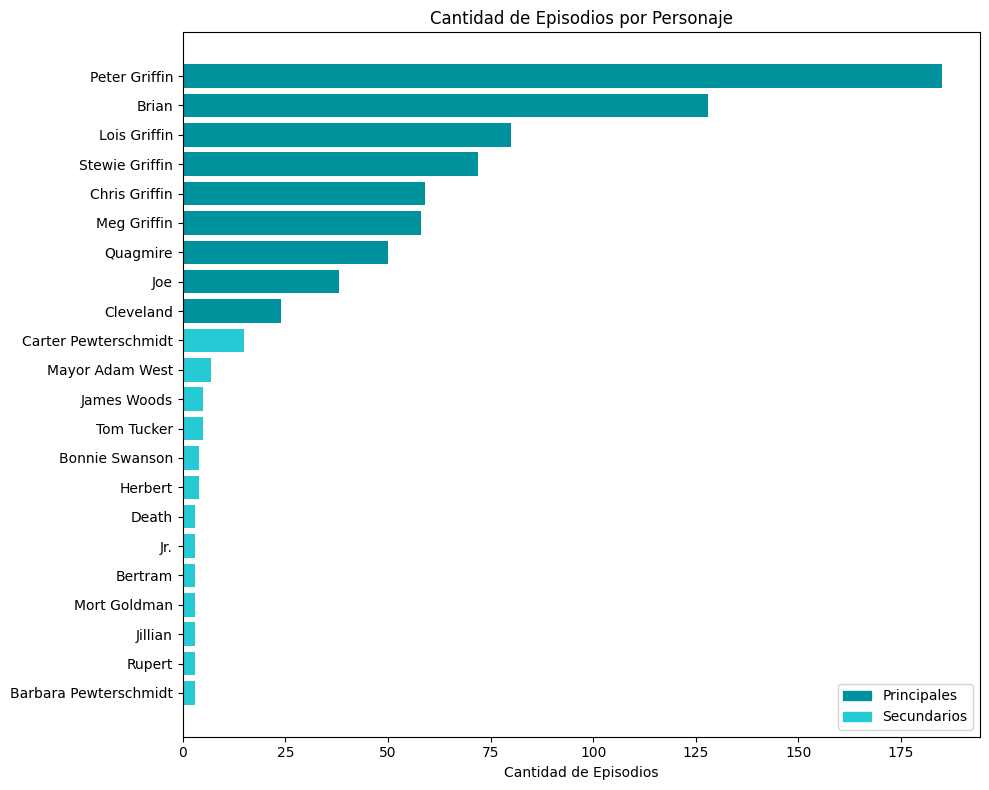

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

personajes = {
    "Peter Griffin": 185,
    "Brian": 128,
    "Lois Griffin": 80,
    "Stewie Griffin": 72,
    "Meg Griffin": 58,
    "Chris Griffin": 59,
    "Quagmire": 50,
    "Joe": 38,
    "Cleveland": 24,
    "Carter Pewterschmidt": 15,
    "Mayor Adam West": 7,
    "James Woods": 5,
    "Tom Tucker": 5,
    "Bonnie Swanson": 4,
    "Herbert": 4,
    "Death": 3,
    "Jr.": 3,
    "Bertram": 3,
    "Mort Goldman": 3,
    "Jillian": 3,
    "Rupert": 3,
    "Barbara Pewterschmidt": 3,
}


grupos = {
    "Principales": ["Peter Griffin", "Brian", "Lois Griffin", "Stewie Griffin", "Meg Griffin", "Chris Griffin", "Quagmire", "Joe", "Cleveland"],
    "Secundarios": ["James Woods", "Tom Tucker", "Bonnie Swanson", "Herbert", "Death", "Jr.", "Bertram", "Mort Goldman", "Jillian", "Rupert", "Barbara Pewterschmidt", "Carter Pewterschmidt", "Mayor Adam West"]
}

colors = {
    "Principales": '#00929c',
    "Secundarios": '#26cad4'
}

sorted_personajes = sorted(personajes.items(), key=lambda x: x[1], reverse=True)
personajes_names = [x[0] for x in sorted_personajes]
episodios = [x[1] for x in sorted_personajes]

bar_colors = [colors[next(key for key, value in grupos.items() if personaje in value)] for personaje in personajes_names]

plt.figure(figsize=(10, 8))
bars = plt.barh(personajes_names, episodios, color=bar_colors)
plt.xlabel('Cantidad de Episodios')
plt.title('Cantidad de Episodios por Personaje')
plt.gca().invert_yaxis()

legend_patches = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in colors]
plt.legend(legend_patches, colors.keys())

plt.tight_layout()
plt.show()

Ahora vamos a indagar más separando estos dos grupos:

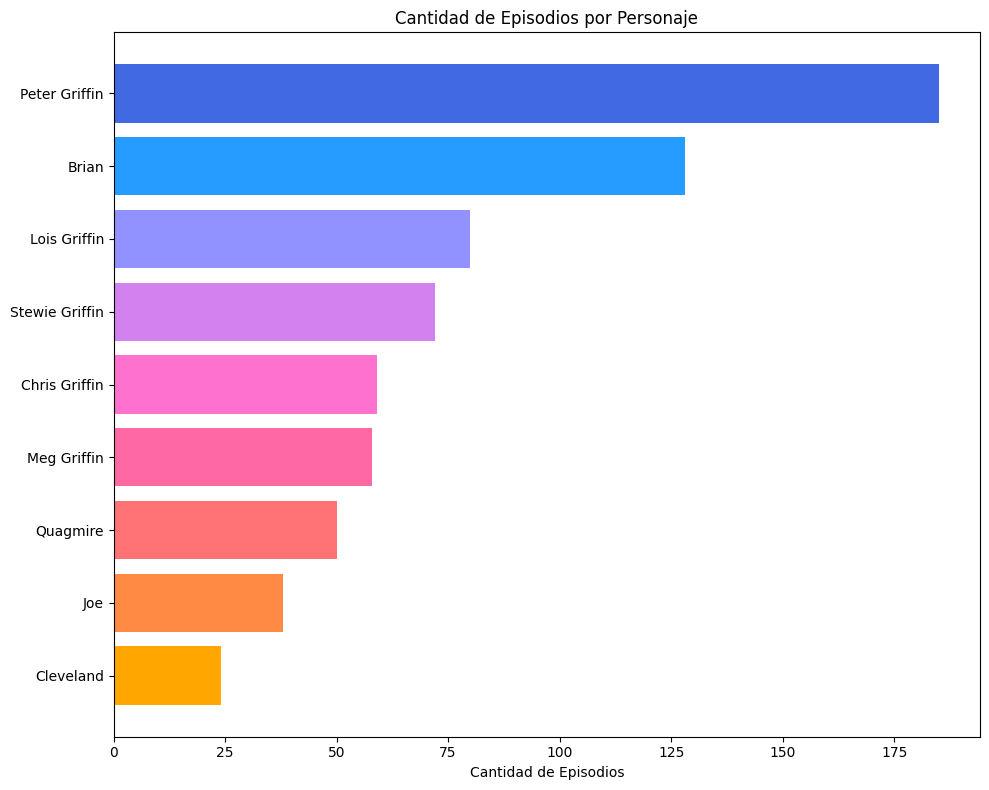

In [ ]:
import matplotlib.pyplot as plt

personajes = {
    "Peter Griffin": 185,
    "Brian": 128,
    "Lois Griffin": 80,
    "Stewie Griffin": 72,
    "Meg Griffin": 58,
    "Chris Griffin": 59,
    "Quagmire": 50,
    "Joe": 38,
    "Cleveland": 24
}

colores = ['royalblue', '#259cff', '#9191ff', '#d381ef', '#ff71ce', '#ff69a3', '#ff7374', '#ff8a44', '#ffa600']


sorted_personajes = sorted(personajes.items(), key=lambda x: x[1], reverse=True)
personajes_names = [x[0] for x in sorted_personajes]
episodios = [x[1] for x in sorted_personajes]

plt.figure(figsize=(10, 8))
plt.barh(personajes_names, episodios, color=colores)
plt.xlabel('Cantidad de Episodios')
plt.title('Cantidad de Episodios por Personaje')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Aquí no ha nada que me sorprenda ya que los 6 que más aparecen son los que me esperaba, ya que son los la familia Griffin y el orden también esta bastante claro.
Y en cuanto a los amigos de Peter lo mismo, Quagmire es el mejor y Cleveland es mejor que Joe pero se va en la septima temporada, ya que los de la FOX creían que era buena idea que se mudara a otra ciudad y empezara el una serie en solitaro llamada 'El show de Cleveland', cosa que no salió bien y regresó a Padre de familia en la temporada 12.

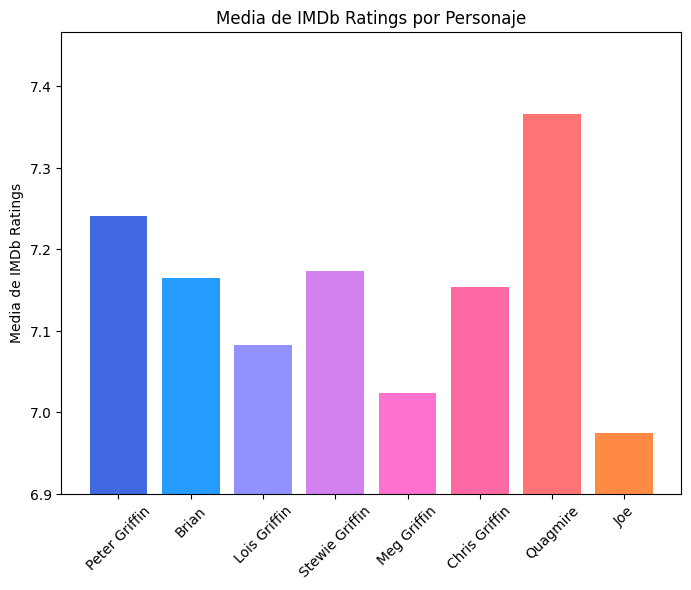

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


df['Featuring'] = df['Featuring'].str.split(',')

personajes = ['Peter Griffin', 'Brian', 'Lois Griffin', 'Stewie Griffin', 'Meg Griffin', 'Chris Griffin', 'Quagmire', 'Joe']

medias_imdb_personajes = {}
for personaje in personajes:
    episodios_con_personaje = df[df['Featuring'].apply(lambda x: personaje in x)]
    media_imdb_personaje = episodios_con_personaje['IMDb Rating'].mean()
    medias_imdb_personajes[personaje] = media_imdb_personaje


personajes = list(medias_imdb_personajes.keys())
medias_imdb = list(medias_imdb_personajes.values())


colores = ['royalblue', '#259cff', '#9191ff', '#d381ef', '#ff71ce', '#ff69a3', '#ff7374', '#ff8a44']

plt.figure(figsize=(8, 6))


for i in range(len(personajes)):
    plt.bar(personajes[i], medias_imdb[i], color=colores[i])

plt.ylabel('Media de IMDb Ratings')
plt.title('Media de IMDb Ratings por Personaje')
plt.xticks(rotation=45)
plt.ylim(6.9, max(medias_imdb) + 0.1)


plt.show()




Esto también va un poco en el camino que me esperaba ya que los episodios Peter es de los que mejor media tiene, ya que es el que sostiene la serie, me sorprende un poco Quagmire pero la verdad es que se lo merece ya que es un personajazo que se caracteriza por ser ninfomano. Y también me gustaría destacar que en la serie hay bastante episodios que se basan en aventuras de Brian y Stewie, es decir, del bebe y el perro, y suelen ser de los mejores episodios. Y el que más me sorprende en esta gráfica es Chris ya que es bastante pringao.

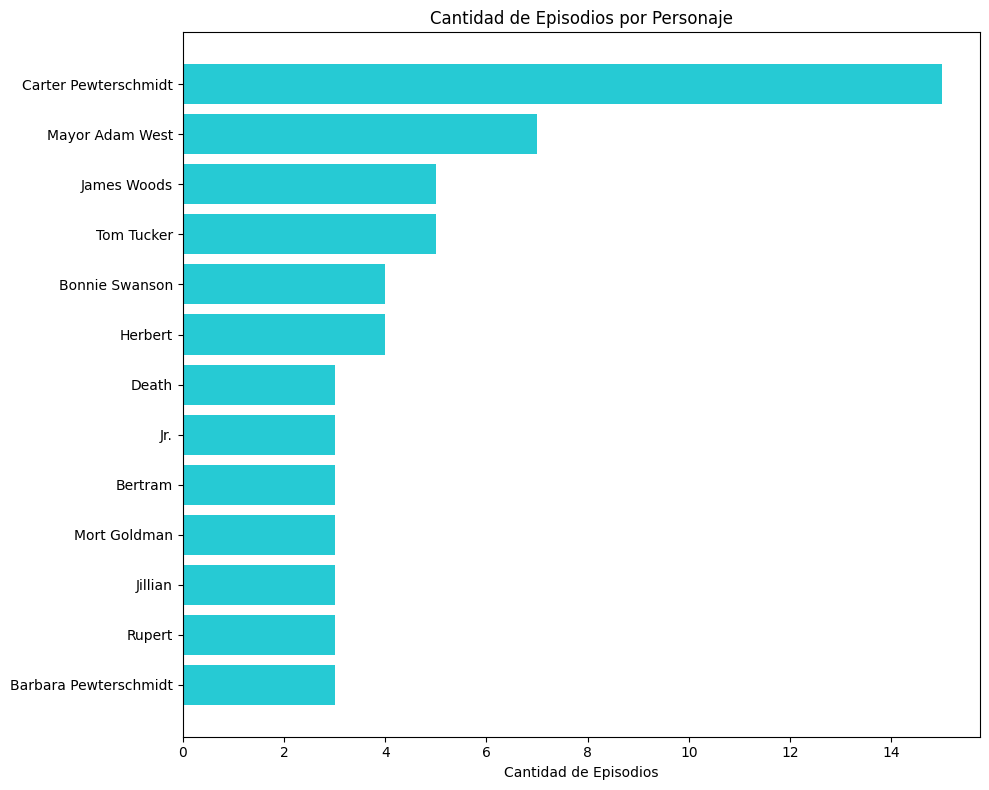

In [27]:
import matplotlib.pyplot as plt

personajes = {
    "Carter Pewterschmidt": 15,
    "Mayor Adam West": 7,
    "James Woods": 5,
    "Tom Tucker": 5,
    "Bonnie Swanson": 4,
    "Herbert": 4,
    "Death": 3,
    "Jr.": 3,
    "Bertram": 3,
    "Mort Goldman": 3,
    "Jillian": 3,
    "Rupert": 3,
    "Barbara Pewterschmidt": 3,
}

sorted_personajes = sorted(personajes.items(), key=lambda x: x[1], reverse=True)
personajes_names = [x[0] for x in sorted_personajes]
episodios = [x[1] for x in sorted_personajes]

plt.figure(figsize=(10, 8))
plt.barh(personajes_names, episodios, color='#26cad4')
plt.xlabel('Cantidad de Episodios')
plt.title('Cantidad de Episodios por Personaje')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

De los personajes secundarios la mayoría son familia de los personajes principales pero cabe destacar un par que son de los mejores personajes de la serie. Una es la Muerte que solo protagoniza 3 episodios, que son muy buenos, en los que tiene de media en IMDb de un 8.2 sobre 10, pero también sale en bastantes más. Y el otro es el alcalde Adam West, este es más reincidente en la serie y es uno de los mejores personajes de dibujos animados que he visto, el personaje es como cualquier alcalde de una ciudad se tomara unas setas alucinógenas.

In [6]:
# Ahora vamos a ver un poco por encima las apariciones
from collections import defaultdict
import matplotlib.pyplot as plt

conteo_por_personaje = defaultdict(int)

secundarios_por_episodio = df['Also Appearing']

for episodio in secundarios_por_episodio:
    personajes_episodio = episodio.split(', ')
    personajes_unicos = set(personajes_episodio)
    for personaje in personajes_unicos:
        conteo_por_personaje[personaje] += 1

conteo_filtrado = {personaje: conteo for personaje, conteo in conteo_por_personaje.items() if conteo > 49}

nombres_personajes = list(conteo_filtrado.keys())
recuento_episodios = list(conteo_filtrado.values())

print("Personajes y su recuento de episodios (más de un episodio), ordenados de mayor a menor:")

conteo_ordenado = {k: v for k, v in sorted(conteo_filtrado.items(), key=lambda item: item[1], reverse=True)}

for personaje, recuento in conteo_ordenado.items():
    print(f"{personaje}: {recuento} episodios")

Personajes y su recuento de episodios (más de un episodio), ordenados de mayor a menor:
Chris: 309 episodios
Meg: 309 episodios
Lois: 266 episodios
Stewie: 259 episodios
Brian: 249 episodios
Quagmire: 218 episodios
Joe: 196 episodios
Tom Tucker: 177 episodios
Cleveland: 174 episodios
Peter: 138 episodios
Rupert: 115 episodios
Mayor Adam West: 115 episodios
Dr. Hartman: 86 episodios
Bonnie: 83 episodios
Cleveland Brown: 79 episodios
Herbert: 78 episodios
Mort Goldman: 75 episodios
Bruce: 73 episodios
Seamus: 69 episodios
Joe Swanson: 65 episodios
Bonnie Swanson: 58 episodios
Tricia Takanawa: 57 episodios
Principal Shepherd: 56 episodios
Diane Simmons: 54 episodios
Glenn Quagmire: 53 episodios
Carter Pewterschmidt: 52 episodios


Ya tenemos la lista con todas las apariciones de los personajes pero  vamos a centrarnos en los personajes secundarios ya que si no los principales destacan demasiado. Para ello eliminamos a los personajes principales de la lista


In [ ]:
personajes = {
    "Chris": 309,
    "Meg": 309,
    "Lois": 266,
    "Stewie": 259,
    "Brian": 249,
    "Quagmire": 218,
    "Joe": 196,
    "Tom Tucker": 177,
    "Cleveland": 174,
    "Peter": 138,
    "Rupert": 115,
    "Mayor Adam West": 115,
    "Dr. Hartman": 86,
    "Bonnie": 83,
    "Cleveland Brown": 79,
    "Herbert": 78,
    "Mort Goldman": 75,
    "Bruce": 73,
    "Seamus": 69,
    "Joe Swanson": 65,
    "Bonnie Swanson": 58,
    "Tricia Takanawa": 57,
    "Principal Shepherd": 56,
    "Diane Simmons": 54,
    "Glenn Quagmire": 53,
    "Carter Pewterschmidt": 52
}

# Agrupamos los personajes
if "Joe Swanson" in personajes and "Joe" in personajes:
    personajes["Joe"] += personajes["Joe Swanson"]
    del personajes["Joe Swanson"]

if "Bonnie Swanson" in personajes and "Bonnie" in personajes:
    personajes["Bonnie"] += personajes["Bonnie Swanson"]
    del personajes["Bonnie Swanson"]

if "Cleveland Brown" in personajes and "Cleveland" in personajes:
    personajes["Cleveland"] += personajes["Cleveland Brown"]
    del personajes["Cleveland Brown"]

if "Glenn Quagmire" in personajes and "Quagmire" in personajes:
    personajes["Cleveland"] += personajes["Glenn Quagmire"]
    del personajes["Glenn Quagmire"]

# Vamos a quitar de las apariciones de los personajes principales
personajes.pop('Chris')
personajes.pop('Meg')
personajes.pop('Lois')
personajes.pop('Stewie')
personajes.pop('Brian')
personajes.pop('Quagmire')
personajes.pop('Joe')
personajes.pop('Peter')
personajes.pop('Cleveland')

# Mostrar los personajes
for personaje, episodios in sorted(personajes.items(), key=lambda x: x[1], reverse=True):
    print(f"{personaje}: {episodios} episodios")


Tom Tucker: 177 episodios
Bonnie: 141 episodios
Rupert: 115 episodios
Mayor Adam West: 115 episodios
Dr. Hartman: 86 episodios
Herbert: 78 episodios
Mort Goldman: 75 episodios
Bruce: 73 episodios
Seamus: 69 episodios
Tricia Takanawa: 57 episodios
Principal Shepherd: 56 episodios
Diane Simmons: 54 episodios
Carter Pewterschmidt: 52 episodios
Donna: 47 episodios
Jerome: 45 episodios
Barbara Pewterschmidt: 40 episodios
Jr.: 39 episodios
Angela: 38 episodios
Consuela: 36 episodios
Carl: 31 episodios
Neil Goldman: 30 episodios
God: 28 episodios
Elmer Hartman: 27 episodios
Joyce Kinney: 27 episodios
Ollie Williams: 26 episodios
Opie: 26 episodios
Kevin Swanson: 25 episodios
Patty: 22 episodios
Ernie the Giant Chicken: 21 episodios
Doug: 21 episodios
Horace: 20 episodios


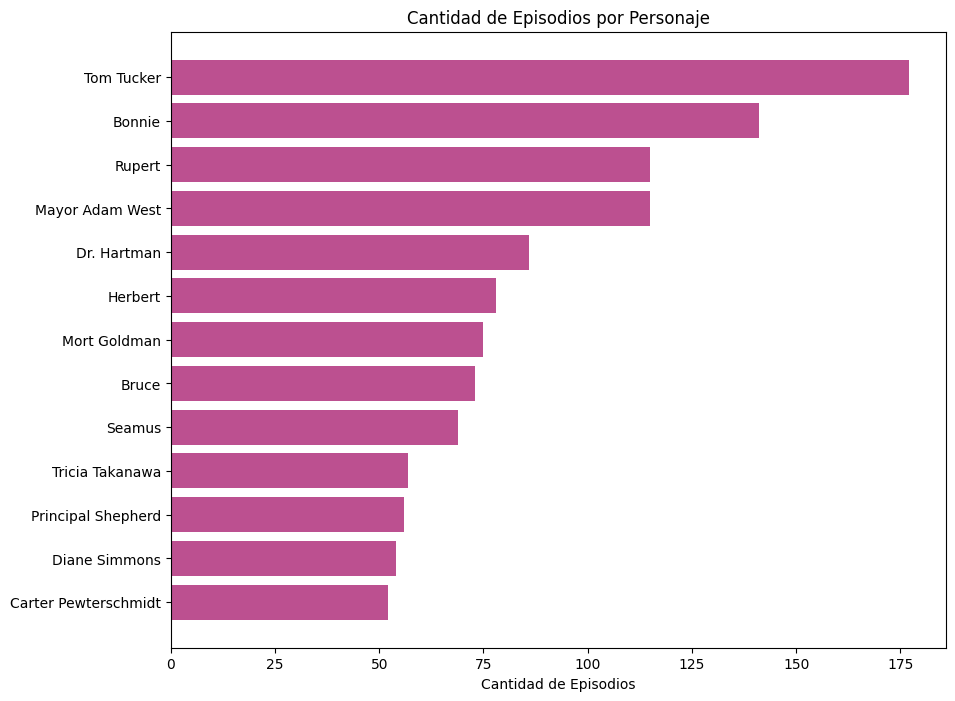

In [29]:
import matplotlib.pyplot as plt

personajes = {
    "Tom Tucker": 177,
    "Bonnie": 141,
    "Rupert": 115,
    "Mayor Adam West": 115,
    "Dr. Hartman": 86,
    "Herbert": 78,
    "Mort Goldman": 75,
    "Bruce": 73,
    "Seamus": 69,
    "Tricia Takanawa": 57,
    "Principal Shepherd": 56,
    "Diane Simmons": 54,
    "Carter Pewterschmidt": 52
}

# Mostrar los personajes y sus recuentos de episodios actualizados
sorted_personajes = sorted(personajes.items(), key=lambda x: x[1], reverse=True)
personajes_names = [x[0] for x in sorted_personajes]
episodios = [x[1] for x in sorted_personajes]

plt.figure(figsize=(10, 8))
plt.barh(personajes_names, episodios, color='#bc5090')
plt.xlabel('Cantidad de Episodios')
plt.title('Cantidad de Episodios por Personaje')
plt.gca().invert_yaxis()
plt.show()


En este gráfico ya vemos las apariciones de los secundarios. Otra vez nada nuevo, el primero el presentador de las noticias, después la mujer de Joe y si que cabe destacar que este tercero Rupert que es el osito de peluche de Stewie pero es inanimado, es decir, no llega a moverse ni a hablar en toda la serie. Y luego los personajes que aparecen en toda serie animada, el acalde, el doctor, la reportera, el director del instituto, el suegro...
Mención especial a Padre de familia ya que a parte de stos típicos personajes también tiene a un vecino judío (Mort Goldman) y a un viejo pedófilo (Herbert) que son de los persoanjes que más aparecen en la serie.